# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


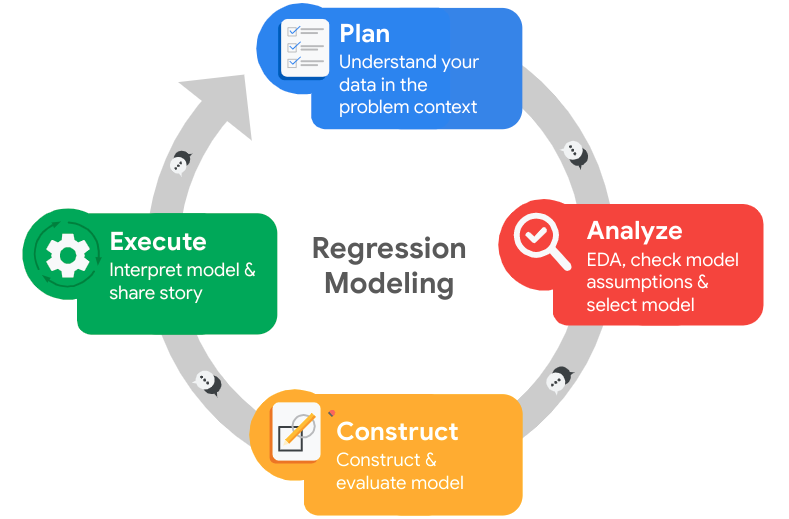

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]  
- Main stakeholder for this project is the HR department at Salifort Motors. Other stakeholders include data team colleagues, relative department managers and top company executives.
- The ultimate goal is to find out how to improve employee retention. To achieve the goal, we need to build model to predict if a employee is going to leave or not and find out the main driven causes.
- Just by reviewing the data dictionary, all the data provided are likely related to a employee's decision to stay or leave. It's better if we have have more data, such as employee's level (i.e. operator, executive, or manager, etc.), last bonus, opportunity for training last year, relationship with colleagues, etc.
- Data source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).
- Ethical consideration
  - We need to be very careful on the application of the model (predict leave or stay) built.
  - If a manager predict one of his/her subordinate is likely to leave, he/she may act againt him/her.
  - The purpose of this model is to find out the important features that may impact employees' decision to stay or leave. This conclusion can be distributed to all department managers to take improvement actions, but using the model to predict if a specificated employee will stay or not should be prohibited or strictly limited.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from mixed_naive_bayes import MixedNB
from xgboost import XGBClassifier

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'satisfaction_level': 'satisfaction',
                    'last_evaluation': 'last_eval',
                    'number_project': 'num_project',
                    'average_montly_hours': 'avg_monthly_hrs',
                    'time_spend_company': 'tenure',
                    'Work_accident': 'work_accident',
                    'promotion_last_5years': 'promo_last_5years',
                    'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_eval', 'num_project', 'avg_monthly_hrs', 'tenure',
       'work_accident', 'left', 'promo_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum().sum()

0

There is no missing value in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

3008 duplicated data.

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction,last_eval,num_project,avg_monthly_hrs,tenure,work_accident,left,promo_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Without employee ID or other identification information, it is difficult to tell if these are real duplication or not. In real life, we need to approach data owner for clarification. Here we just remove all the duplicate rows.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates().reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction,last_eval,num_project,avg_monthly_hrs,tenure,work_accident,left,promo_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

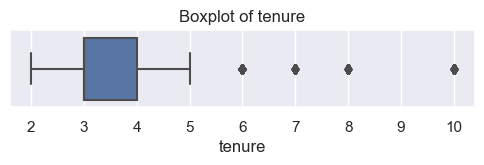

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.set_theme()
plt.figure(figsize=(6, 1.))
sns.boxplot(df1, x='tenure')
plt.title('Boxplot of tenure')
plt.show()

Majority of the employees have served 2 to 5 years.

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

## NOTE: usually we need to calculate lower and higher limit by IQR. 
## Here we use a shortcut since above boxplot clearly shows outlier is >= 6.
(df1['tenure']>=6).sum()

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Data is imbalanced with 83.4% of stayed employees and 16.6% of left employees.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


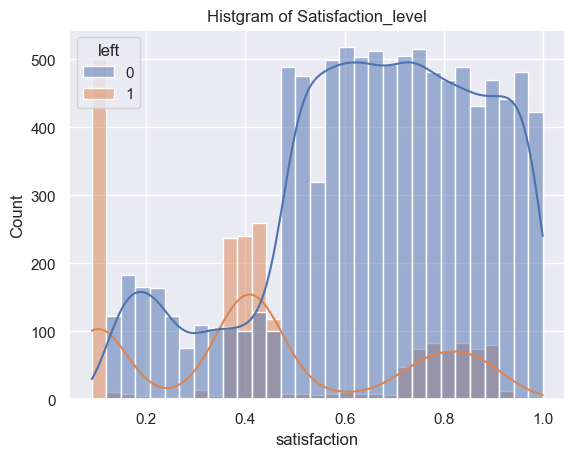

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='satisfaction', kde=True, hue='left')
plt.title('Histgram of Satisfaction_level')
plt.show()

It is easy to understand employees with satisfaction level of 0 will leave.  
But why are there another 2 clusters centered at 0.4 and 0.8?  
Interesting...

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


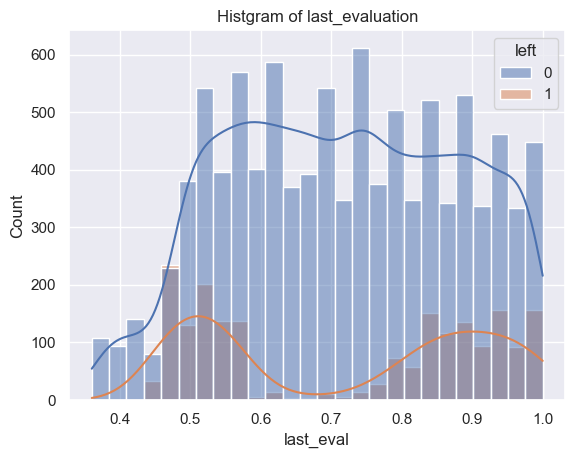

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='last_eval', kde=True, hue='left')
plt.title('Histgram of last_evaluation')
plt.show()

- Low performance (~0.5) and high performance (>0.8) employees may leave.
  - Low performance employees may find themselves not suitable for his/her job.
  - High performance employees may want better job.
- Mid performance (0.6~0.75) employees tend to stay.
- Very low performance (<0.45) employees also tend to stay.
  - Maybe they cannot find better job outside either.

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


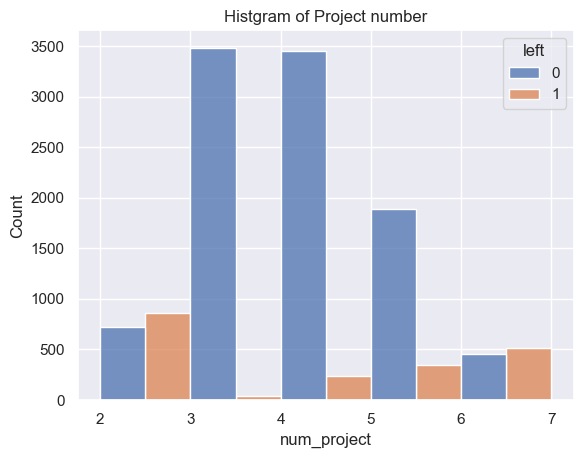

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='num_project', hue='left', multiple='dodge', binwidth=1)
plt.title('Histgram of Project number')
plt.show()

- Too few or too many projects both encourage employees to leave.
  - With too few projects, the employee may feel ignored.
  - With too many projects, maybe there is work life balance issue.

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


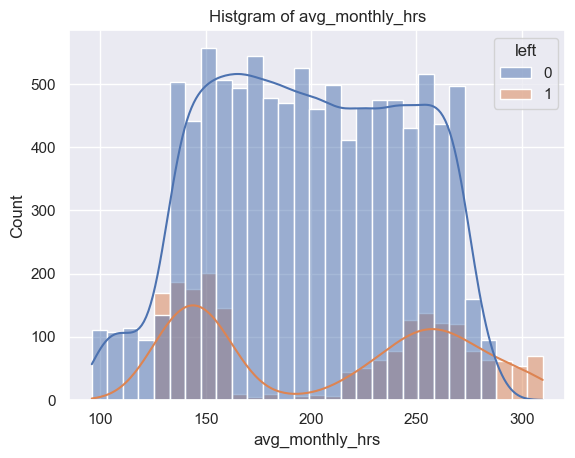

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='avg_monthly_hrs', kde=True, hue='left')
plt.title('Histgram of avg_monthly_hrs')
plt.show()

- Also 2 clusters, maybe correlated with number of projects.

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


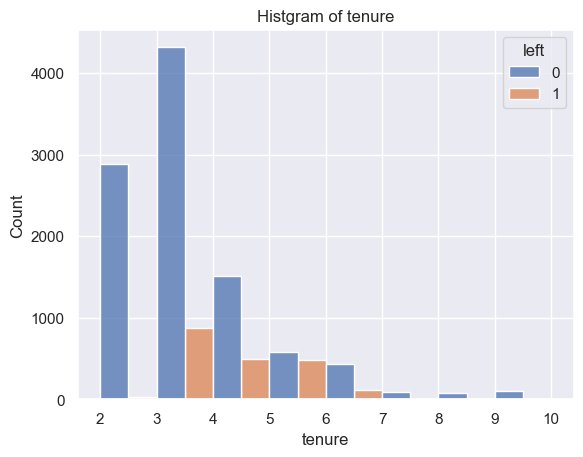

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', binwidth=1)
plt.title('Histgram of tenure')
plt.show()

Most left employees served 3~5 years.

In [19]:
print(df1.groupby('work_accident')['left'].value_counts())
print(df1.groupby('work_accident')['left'].value_counts(normalize=True))

work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: count, dtype: int64
work_accident  left
0              0       0.814022
               1       0.185978
1              0       0.943243
               1       0.056757
Name: proportion, dtype: float64


- With work accident, employee is less likely to leave?
  - I don't understand the logic, maybe it is not significant due to small sample size.

In [20]:
print(df1.groupby('promo_last_5years')['left'].value_counts())
print(df1.groupby('promo_last_5years')['left'].value_counts(normalize=True))

promo_last_5years  left
0                  0       9805
                   1       1983
1                  0        195
                   1          8
Name: count, dtype: int64
promo_last_5years  left
0                  0       0.831778
                   1       0.168222
1                  0       0.960591
                   1       0.039409
Name: proportion, dtype: float64


- Recently promoted employees are less likely to leave?
  - Sample size is too small

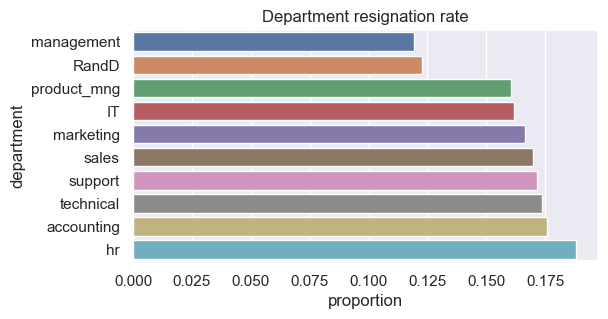

In [21]:
df_department = df1.groupby('department')['left'].value_counts(normalize=True).reset_index()
df_department = df_department[df_department['left']==1]
df_department = df_department.sort_values('proportion')
plt.figure(figsize=(6,3))
sns.barplot(df_department, x='proportion', y='department')
plt.title('Department resignation rate')
plt.show()

There is some difference among departments, but overall not very imbalanced.

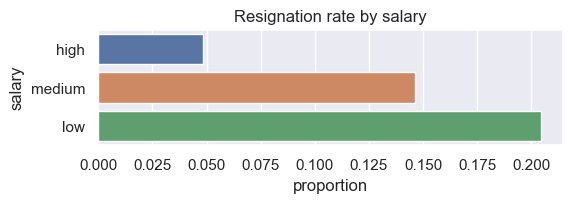

In [22]:
df_salary = df1.groupby('salary')['left'].value_counts(normalize=True).reset_index()
df_salary = df_salary[df_salary['left']==1]
df_salary = df_salary.sort_values('proportion')
plt.figure(figsize=(6,1.5))
sns.barplot(df_salary, x='proportion', y='salary')
plt.title('Resignation rate by salary')
plt.show()

Obviously salary level is a key point.  
We shall generate a new column `salary_lvl` to prepare for pair plot analysis.

In [23]:
df1['salary_lvl'] = df1['salary'].map({'low': 1, 'medium': 2, 'high': 3})

Just look at `last_evaluation vs. satisfaction_level` scattor plot, we can find the left employees form 3 clusters.

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

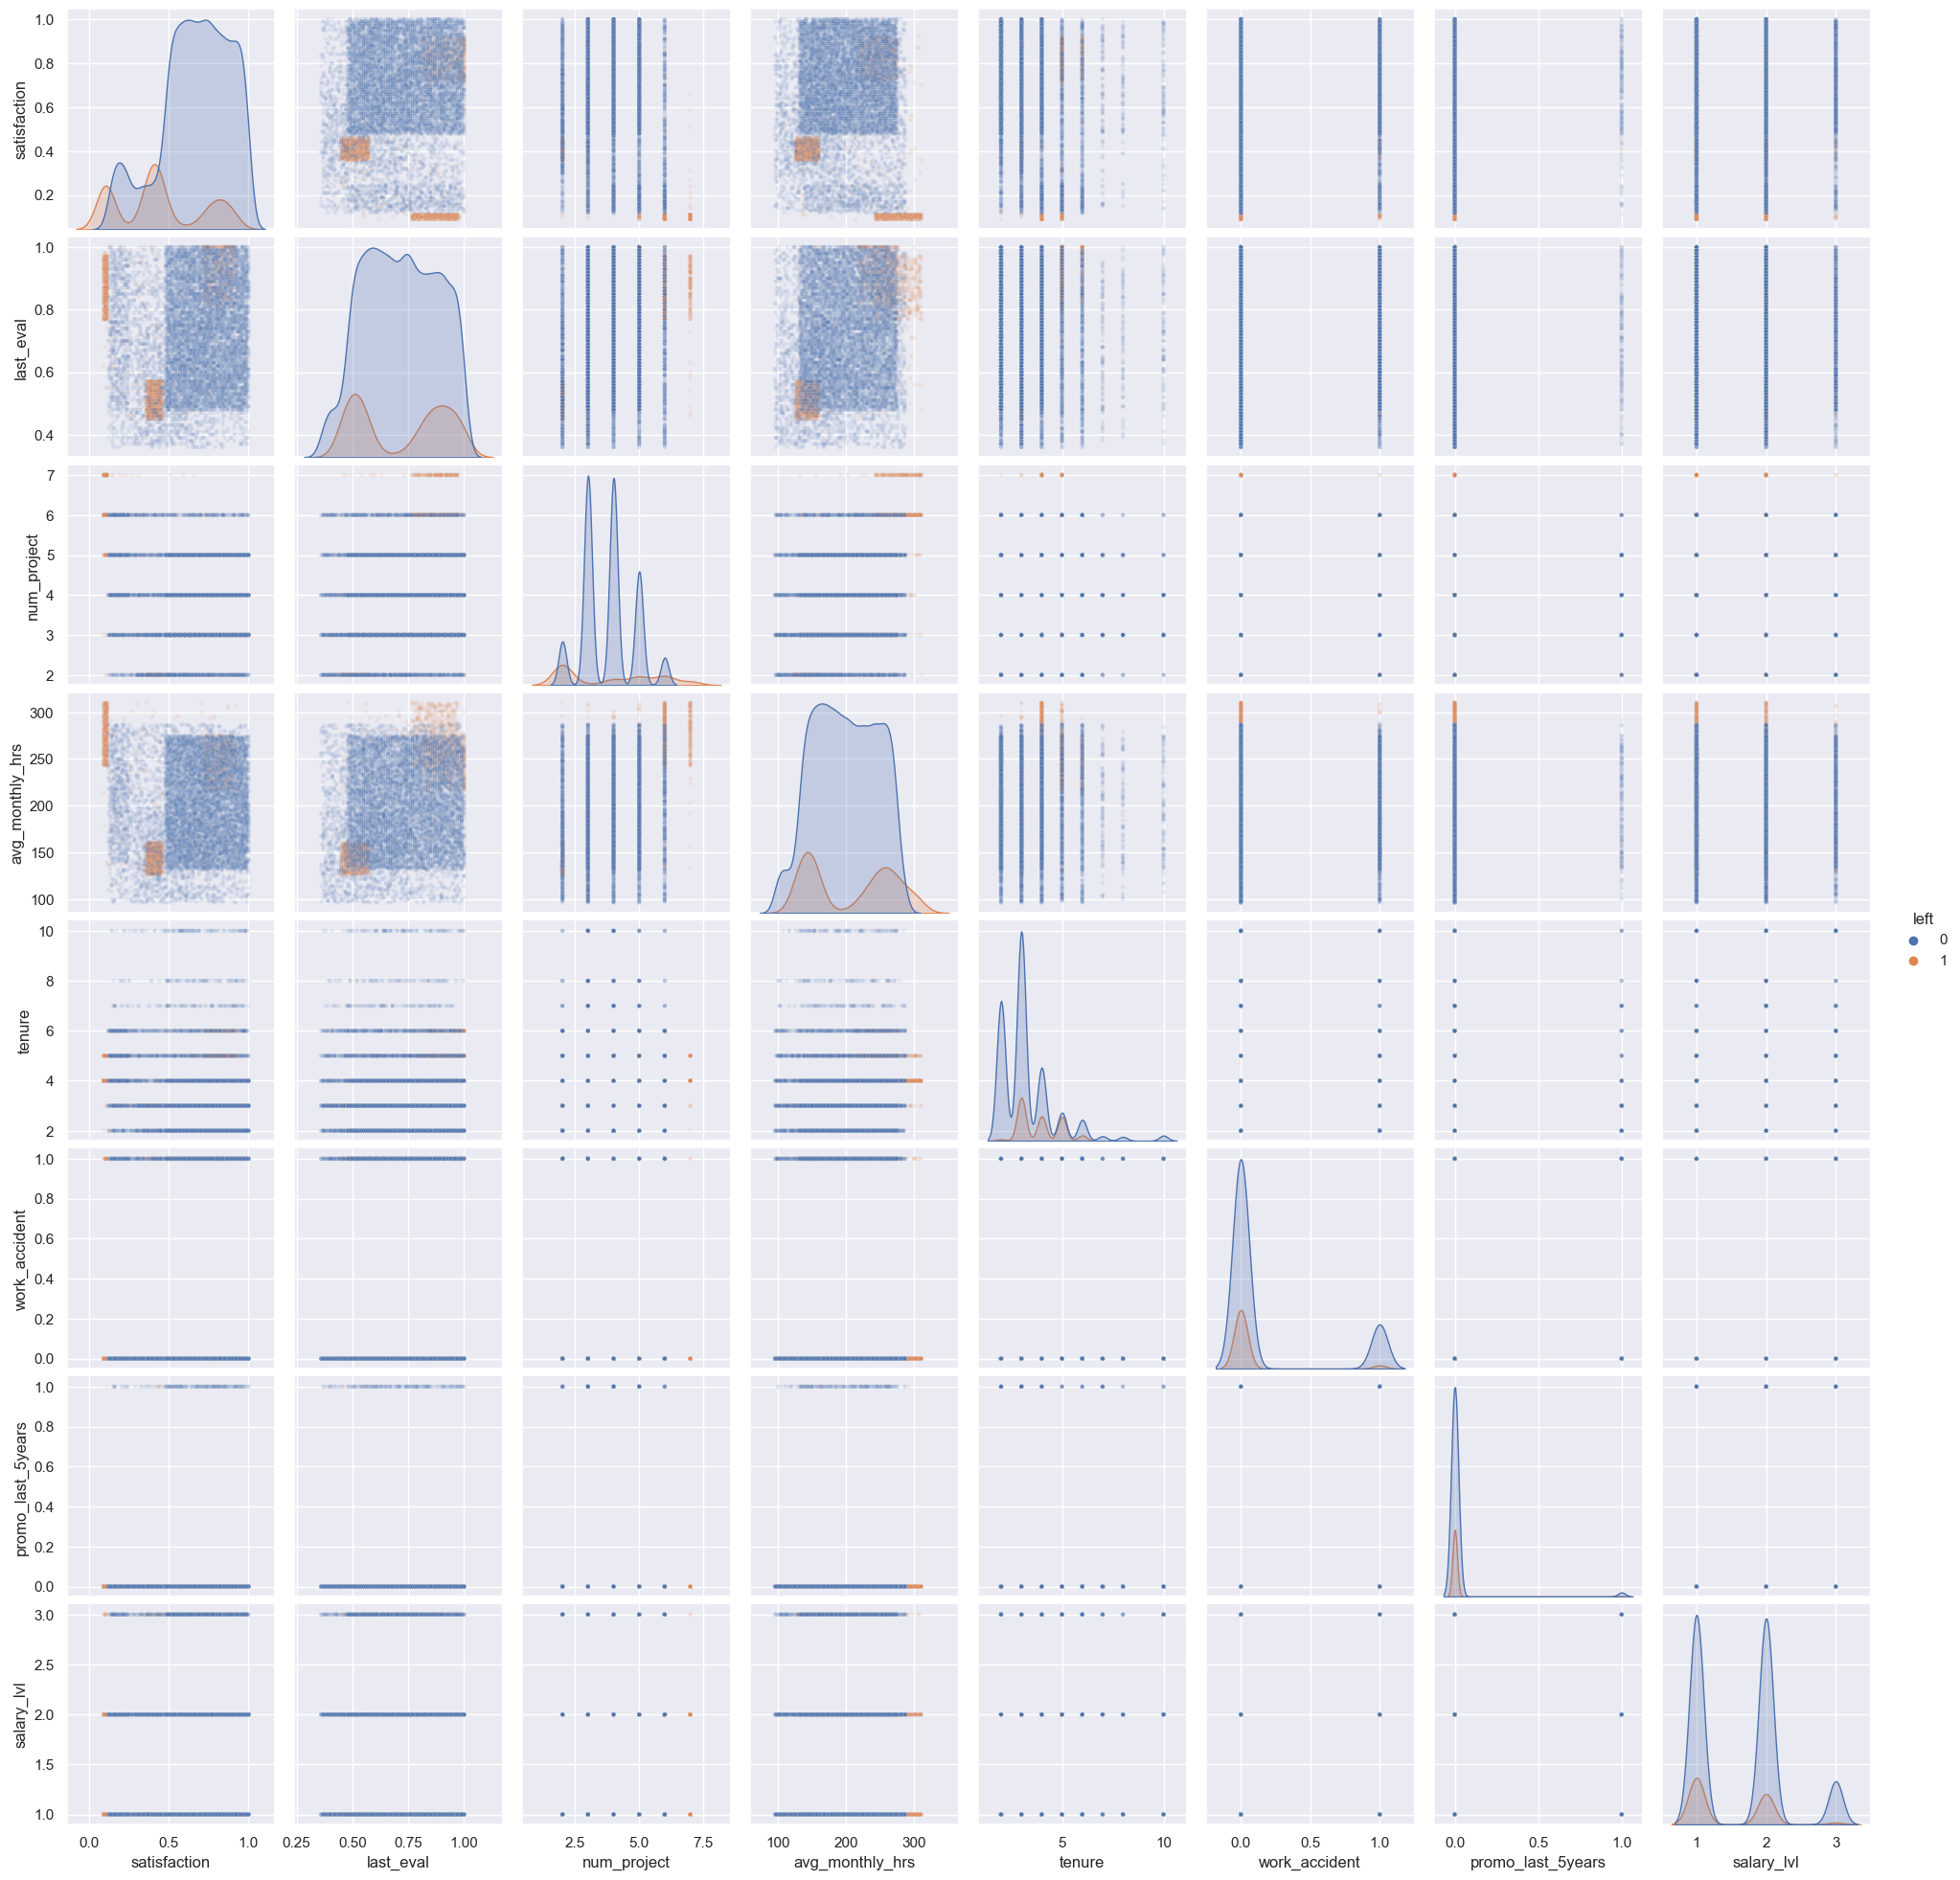

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df1, hue='left', plot_kws={'alpha':0.1,'s':10})

c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\zhang\anaconda3\envs\ZZ_ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

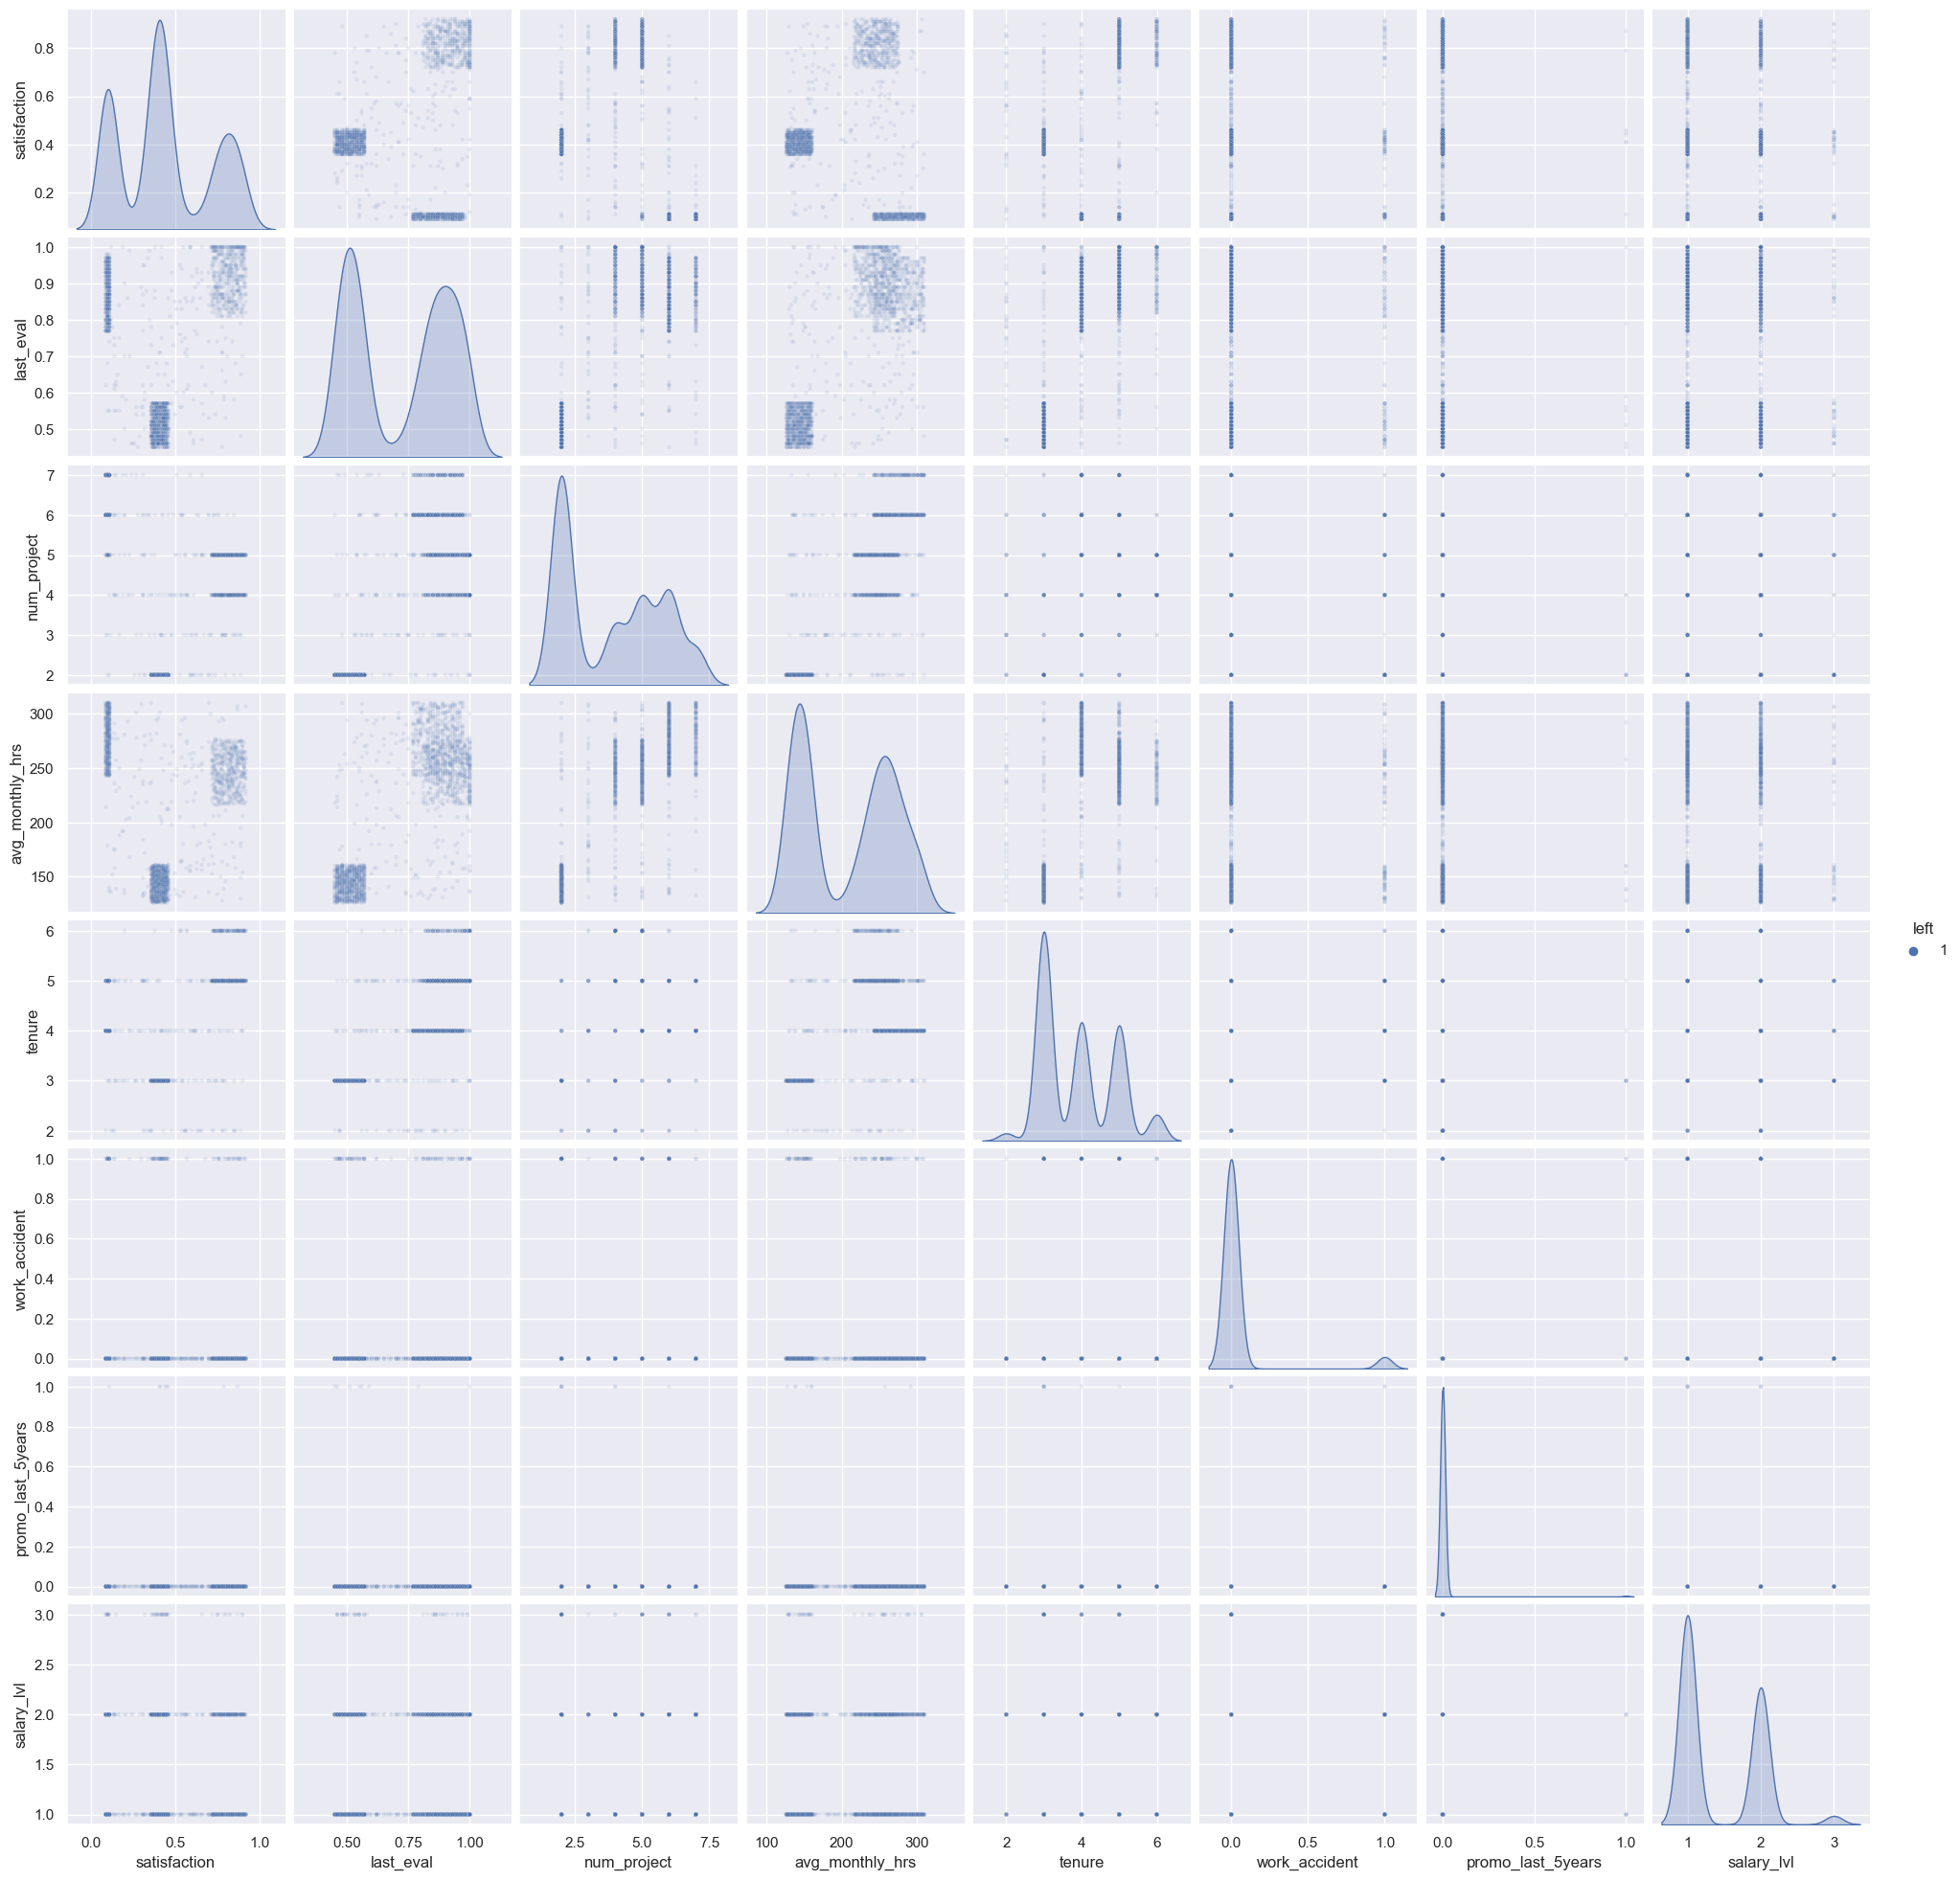

Pair analysis for left employees only


In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df1[df1['left']==1], hue='left', plot_kws={'alpha':0.1,'s':10})
plt.show()
print('Pair analysis for left employees only')

We can clearly observe the features of left employees fall into 3 clusters:
1. Extremely low satisfaction level group
    - Very high leaving rate (almost all gone)
    - Satisfaction level: ~ 0.1
    - Coupled with other features
      - High number of projects: 6 ~ 7
      - Long average monthly working hours: 250 ~ 300+
      - Tenure: 4 ~ 5 years
      - No promotion in last 5 years, actually never promoted considering their tenure
      - Salary: mostly low to mid level
    - Root cause of leaving: likely **work-life imbalance issue** leading to extremely low satisfaction level
2. Low last evaluation group
    - Very high leaving rate
    - Last evaluation: 0.43 ~ 0.58
      - Low eval score is NOT the only root cause for them to leave, as there are many employees scored < 0.4 but still choose to stay
    - Couple with other features
      - Mid satisfaction level: ~ 0.4
      - Low number of project: mostly 2 only
      - Low average monthly working hours: < 170
      - Short tenure: mostly 3 only
      - No promotion in last 5 years, actually never promoted considering their tenure
    - Root cause of leaving: likely due to **lack of motivation**
3. Good performance group
    - Significant leaving rate (though not all gone)
      - High satisfaction level: 0.7 ~ 0.95 (not extremely high)
      - High last evaluation score: 0.8 ~ 1.0 (density of score 1.0 is very high)
      - Mid number of project: typically 4 ~ 5
      - Long average monthly working hours: 220 ~ 270 (not extremely long)
      - Tenure: 4 ~ 5 years
      - No promotion in last 5 years, actually never promoted considering their tenure
      - Salary: mostly low to mid level
    - Root cause of leaving: Likely have **better outside opportunity**

Compare salary and department ratio distribution for left and stay employees in group 3


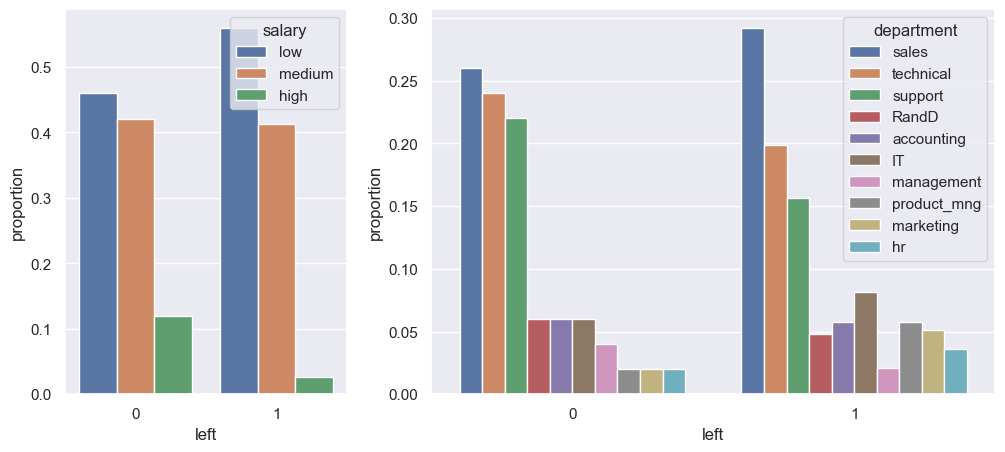

In [26]:
condition = (0.7 <= df1['satisfaction']) & (df1['satisfaction'] <= 0.95) & \
            (0.8 <= df1['last_eval']) & (df1['last_eval'] <= 1) & \
            (4 <= df1['num_project']) & (df1['num_project'] <= 5) & \
            (220 <= df1['avg_monthly_hrs']) & (df1['avg_monthly_hrs'] <= 270) & \
            (4 <= df1['tenure']) & (df1['tenure'] <= 5) & \
            (df1['promo_last_5years'] == 0)
df_group3 = df1[condition]
fig, axs = plt.subplots(1, 2, figsize=(12, 5), width_ratios=[1,2])
sns.barplot(df_group3.groupby('left')['salary'].value_counts(normalize=True).reset_index(),
            y='proportion', x='left', hue='salary', ax=axs[0])
sns.barplot(df_group3.groupby('left')['department'].value_counts(normalize=True).reset_index(),
            y='proportion', x='left', hue='department', ax=axs[1])
print('Compare salary and department ratio distribution for left and stay employees in group 3')
plt.show()

This is to understand within group 3 conditions, why some employee decides to stay while others want to leave:
- Relatively lower salary is likely to be the cause to leave.
- Some departments (sales, IT, product_mng, marketing, hr) have higher leaving rate at the same conditions.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]  
Main finding is the 3 clusters of left employees as discussed above.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

We are not sure if the stakeholders want to prioritize type 1 error or type 2 error. Here we choose to prioritize F1 score which balance between type 1 and type 2 errors.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

This is a supervised binominal classification task.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

I think decision tree based models are most suitable. I will try both random forest and XGB models.

I will also try Naive Bayes model, though the independent variables contain both continuous and categorical ones.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### 1. Random Forest Model

Decision tree based models has few assumptions. Based on EDA we can see all independent variables have some relationship to the dependent variable, so we will keep all of them for the model.

In [27]:
### YOUR CODE HERE ###
# Transform data for model preparation
df_tree_model = df1.drop(['salary'], axis=1) # salary is already encoded in salary_lvl
df_tree_model = pd.get_dummies(df_tree_model) # dummy encoded department

# Split X, y variables
y = df_tree_model['left']
X = df_tree_model.drop(['left'], axis=1)

# Split train, test data (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# define model, parameters, scoring, etc.
rf_estimator = RandomForestClassifier(random_state=0)
para = {'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 2, 4, 8],
        'min_samples_leaf': [1, 5, 10, 50, 200],
        'criterion': ['gini', 'entropy', 'log_loss']}
scoring = ['roc_auc', 'precision', 'recall', 'accuracy', 'f1']

rf_model = GridSearchCV(estimator=rf_estimator,
                        param_grid=para,
                        scoring=scoring,
                        n_jobs=-1,
                        cv=4,
                        refit='f1')

In [28]:
# rf_model.fit(X_train, y_train)

In [29]:
# pickle.dump(rf_model, open('rf_model.pickle', 'wb'))

In [30]:
rf_model = pickle.load(open('rf_model.pickle', 'rb'))

In [31]:
# Show best estimator with parameters
rf_model.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=0)

In [32]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): roc_auc, precision, recall, f1, or accuracy

    Returns a pandas df with the roc_auc, F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 'roc_auc': 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'roc_auc': [roc_auc]
                        },
                       )

    return table

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of roc_auc, precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)
    roc_auc = metrics.roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'roc_auc': [roc_auc]
                        })

    return table

In [33]:
results = pd.concat([make_results('RF CV', rf_model, 'f1'),
                     get_test_scores('RF test', rf_model.predict(X_test), y_test)],
                     axis=0)
results

,model,precision,recall,F1,accuracy,roc_auc
0,RF CV,0.986208,0.908906,0.945964,0.982764,0.979516
0,RF test,0.991398,0.925703,0.957425,0.986324,0.962051


Using random forest model, we achieved F1 score ~0.95, which is quite good.  
The scores on test samples are slightly better than CV samples, a good sign of no over fitting.

#### 2. Gradient Boosting Model

Gradient boosting model with tree booster also has few assumptions. We can directly use the same train and test data used for RF model training.

In [34]:
# define model, parameters, scoring, etc.
xgb_estimator = XGBClassifier(random_state=0)
para = {'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [2, 4, 6, 8],
        'min_child_weight': [1, 5, 10, 50, 200],
        'learning_rate': [0.01, 0.03, 0.1, 0.3]}
scoring = ['roc_auc', 'precision', 'recall', 'accuracy', 'f1']

xgb_model = GridSearchCV(estimator=xgb_estimator,
                        param_grid=para,
                        scoring=scoring,
                        n_jobs=-1,
                        cv=4,
                        refit='f1')

In [35]:
# xgb_model.fit(X_train, y_train)

In [36]:
# pickle.dump(xgb_model, open('xgb_model.pickle', 'wb'))

In [37]:
xgb_model = pickle.load(open('xgb_model.pickle', 'rb'))

In [38]:
# Show best estimator with parameters
xgb_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [39]:
results = pd.concat([results,
                     make_results('XGB CV', xgb_model, 'f1'),
                     get_test_scores('XGB test', xgb_model.predict(X_test), y_test)],
                     axis=0)

results

,model,precision,recall,F1,accuracy,roc_auc
0,RF CV,0.986208,0.908906,0.945964,0.982764,0.979516
0,RF test,0.991398,0.925703,0.957425,0.986324,0.962051
0,XGB CV,0.980105,0.920297,0.949214,0.983654,0.984531
0,XGB test,0.978769,0.925703,0.951496,0.984323,0.960851


Result is comparable to RF model.

#### 3. Naive Bayes Model

Naive Bayes model assumes all prediction variables are independent. Our data has some small vialation, such as number of project and average monthly working hours are weekly correlated.

For continuous variables, Gaussian Naive Bayes model assumes normal distribution. To satisfy this assumption, we shall apply Box-Cox transformation on these variables.

Since our data contain both continous and categorical variables, there is no such model readily available in `scikit-learn` package, we use [`mixed-naive-bayes`](https://pypi.org/project/mixed-naive-bayes/) package instead.

In [40]:
# data transform for Naive Bayes Model
df1['department_code'] = pd.factorize(df1['department'])[0]
X_continue = df1[['satisfaction', 'last_eval','avg_monthly_hrs']]
X_category = df1[['num_project', 'tenure', 'work_accident', 
                  'promo_last_5years', 'salary_lvl', 'department_code']]

# encode categorical variables
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X_category)

# prepare train and test datasets
X_continue_train, X_continue_test, X_category_train, X_category_test, y_train_nb, y_test_nb = \
    train_test_split(X_continue, X_category, y, stratify=y, random_state=42, test_size=0.25)

# Apply box-cox transform to contiuous variables
## NOTE: we train the transformer on train dataset only to prevent test dataset leakage
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(X_continue_train)

X_train_nb = pd.concat([pd.DataFrame(enc.transform(X_category_train), columns=X_category.columns), 
                     pd.DataFrame(pt.transform(X_continue_train), columns=X_continue.columns)], 
                    axis=1)
X_test_nb  = pd.concat([pd.DataFrame(enc.transform(X_category_test), columns=X_category.columns), 
                     pd.DataFrame(pt.transform(X_continue_test), columns=X_continue.columns)], 
                    axis=1)

# train NB model
nb_model = MixedNB(categorical_features=[0,1,2,3,4,5])
nb_model.fit(X_train_nb, y_train_nb)

# show score results
results = pd.concat([results,
                     get_test_scores('NB test', nb_model.predict(X_test_nb), y_test_nb)],
                     axis=0)

results

,model,precision,recall,F1,accuracy,roc_auc
0,RF CV,0.986208,0.908906,0.945964,0.982764,0.979516
0,RF test,0.991398,0.925703,0.957425,0.986324,0.962051
0,XGB CV,0.980105,0.920297,0.949214,0.983654,0.984531
0,XGB test,0.978769,0.925703,0.951496,0.984323,0.960851
0,NB test,0.663386,0.676707,0.669980,0.889260,0.804153


Naive Bayes model result is much poorer than RF and XGB models.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

We have built 3 models to predict if a specific employee will stay or leave:  
1. Random forest (RF) model
2. XGBoost (XGB) model, using tree booster
3. Naive Bayes model

Below is the summary of model scores on testing data:

In [41]:
results.iloc[[1,3,4]]

,model,precision,recall,F1,accuracy,roc_auc
0,RF test,0.991398,0.925703,0.957425,0.986324,0.962051
0,XGB test,0.978769,0.925703,0.951496,0.984323,0.960851
0,NB test,0.663386,0.676707,0.669980,0.889260,0.804153


Overall, RF model shows the best performance.  
We can visualize its performance from below confusion matrix.

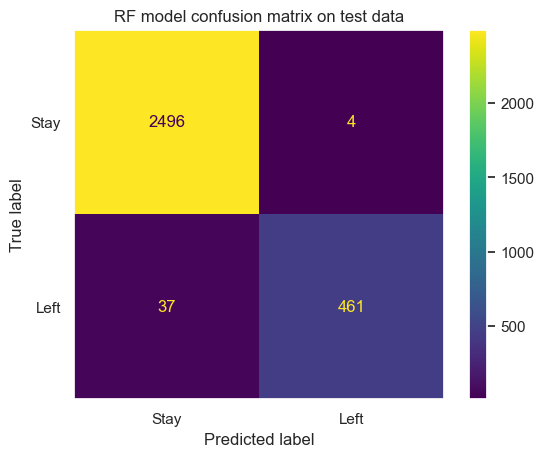

In [42]:
# plot confusion matrix
cm = metrics.confusion_matrix(y_test, rf_model.predict(X_test), labels=rf_model.classes_)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Stay', 'Left'])
disp.plot()
plt.grid()
plt.title('RF model confusion matrix on test data')
plt.show()

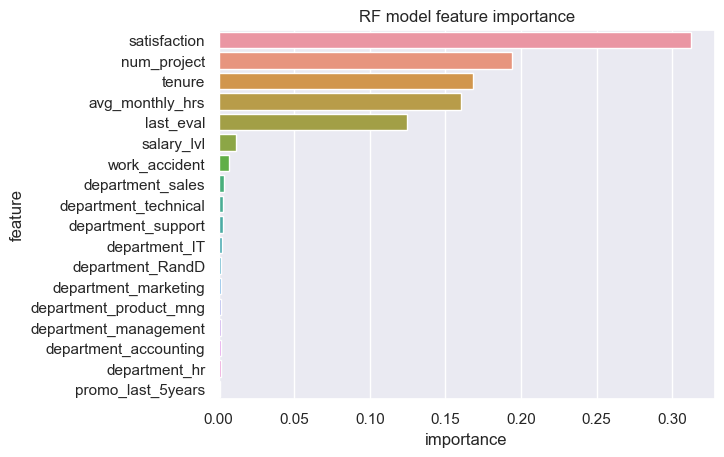

In [43]:
# plot feature importance chart
importance = rf_model.best_estimator_.feature_importances_
feature_importance = pd.DataFrame({'feature': X_test.columns,
                                   'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(feature_importance, x='importance', y='feature')
plt.title('RF model feature importance')
plt.show()

Above is the feature importance plot from this RF model.

Top 5 factors relate to employee leaving are:  
1. Employee satisfaction level
2. Number of projects the employee works on
3. Years of service
4. Average monthly working hours
5. Last evaluation score

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

##### **Conclusion**

We have successfully built a Random Forest model to predict if a specific employee will leave or stay.

##### **Recommendation**

1. Implement the RF model to field.
2. Based on the feature importance suggested by the model, research counter actions to improve employee retention rate.

##### **Next Steps**

1. Retrieve more data on the left employees, such as exit interview records. These data will help to further improve our model and better understand the reasons behind their decisions to leave.
2. Opptunity to generate a better (though more complex) model.
    - From EDA we found the left employees form 3 clusters.
    - We can firstly generate a unsupervised model (e.g. K-means) to seperate all data into these 3 clusters.
    - Then we can build prediciton model (RF or XGB) for each cluster respectively.
    - In this way we can have 2 advantages:
        1. The accuracy of model may further improve.
        2. We can have different feature importance of each cluster respectively, giving us better understanding on the different reasons they choose to leave.

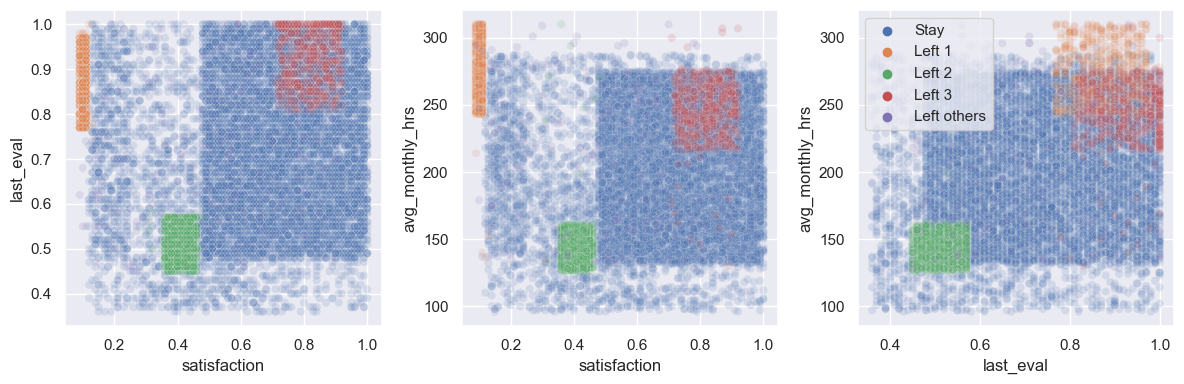

In [44]:
# Manually classify left employee clusters
def employess_classification(employee):
    """Classify employees

    ### Return
    - employee_class [str]: "Stay"|"Left 1"|"Left 2"|"Left 3"|"Left others"

    ### Parameter
    - employee: data from df1
    """
    left = employee['left']
    satisfaction = employee['satisfaction']
    last_eval = employee['last_eval']
    if left == 0:
        employee_class = "Stay"
    elif (satisfaction < 0.15) and (last_eval > 0.75):
        employee_class = "Left 1"
    elif (satisfaction > 0.3) and (satisfaction < 0.5) and (last_eval < 0.6):
        employee_class = "Left 2"
    elif (satisfaction > 0.7) and (last_eval > 0.8):
        employee_class = "Left 3"
    else:
        employee_class = "Left others"
    return employee_class

df1['type'] = [employess_classification(df1.loc[i]) for i in range(len(df1))]

# Plot the clusters
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
sns.scatterplot(df1.sort_values(by=['left', 'type']), 
                x='satisfaction', y='last_eval', hue='type', alpha=0.15, ax=axs[0])
sns.scatterplot(df1.sort_values(by=['left', 'type']), 
                x='satisfaction', y='avg_monthly_hrs', hue='type', alpha=0.15, ax=axs[1])
sns.scatterplot(df1.sort_values(by=['left', 'type']), 
                x='last_eval', y='avg_monthly_hrs', hue='type', alpha=0.15, ax=axs[2])
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].legend()
plt.tight_layout()
plt.show()

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.